### Erosion,Dilation,Opening,Closing

**Erosion**: Ideally removes the boundries A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).


**Dialtion**:It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. 
So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. 
Because, erosion removes white noises,
but it also shrinks our object.

**Opening**:Opening is just another name of erosion followed by dilation. It is useful in removing noise

**Closing**:Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def pltimage(img,title,value):
    plt.figure(figsize=(20,10))
    for i in range(value):
        plt.subplot(2,3,i+1)
        plt.imshow(img[i],'gray')
        plt.title(title[i])
        plt.xticks([]),plt.yticks([])
    return plt.show() 

In [3]:
image = cv2.imread('Input/Image/opencv.png')
# cv2.imshow("Original",image)
# cv2.waitKey(0)

-1

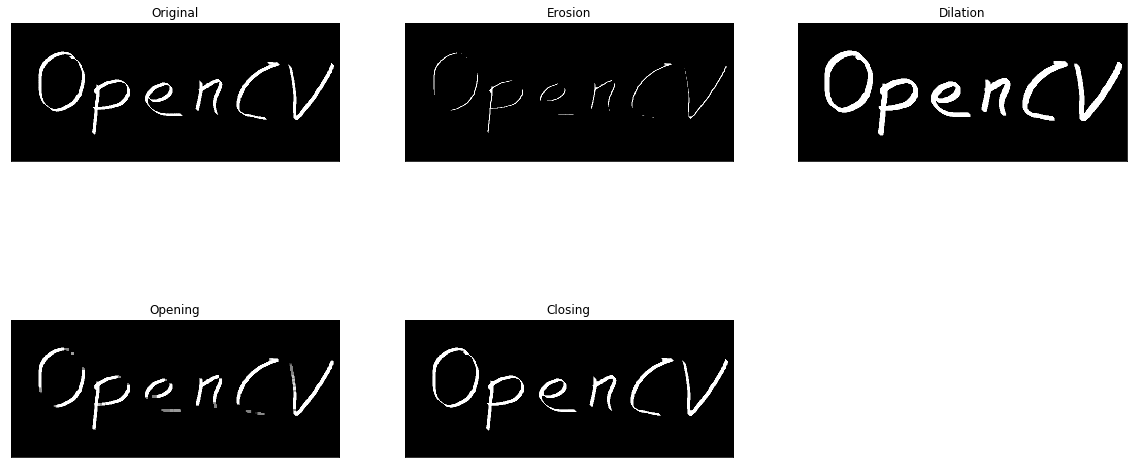

In [12]:
kernel = np.ones((5,5), np.uint8)

# Now we erode
#Erosion : Erodes the boundaries
erosion = cv2.erode(image, kernel, iterations = 1)
# 
dilation = cv2.dilate(image, kernel, iterations = 1)
# Opening - Good for removing noise
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# Closing - Good for removing noise
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

titles = ['Original',"Erosion","Dilation","Opening","Closing"]
images = [image,erosion,dilation,opening,closing]

pltimage(images,titles,5)

### Morphological Gradient,Top hat, Black hat

**Morphological Gradient** : It is the difference between dilation and erosion of an image.


- **Top Hat** :It is the difference between input image and Opening of the image
- **Black Hat**:It is the difference between the closing of the input image and input image.

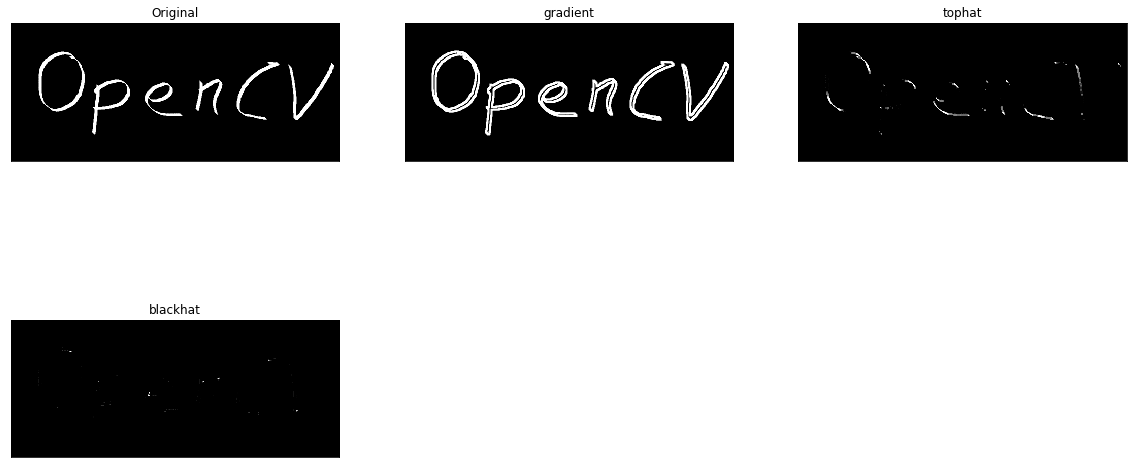

In [14]:
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)

titles = ['Original',"gradient","tophat","blackhat"]
images = [image,gradient,tophat,blackhat]

pltimage(images,titles,4)
